In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
# load dataset

wd = '/Users/ewenwang/Documents/practice_data/'
file = 'credit_card.csv'
data = pd.read_csv(wd+file)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=0)

target = 'Class'
features = [x for x in data.columns if x not in [target]]

In [4]:
import Comparison

com = Comparison.Comparison(train, target, features, scoring='average_precision', record_file='comparison.log')

In [5]:
com.AmongModels()

LR:	0.567120 (0.074925)	time: 23.071090 s
SDG:	0.002740 (0.000592)	time: 2.821413 s
LDA:	0.741559 (0.087796)	time: 7.566606 s
KNN:	0.122592 (0.042042)	time: 17.755049 s
NB:	0.168716 (0.038380)	time: 1.882462 s
CART:	0.542351 (0.068355)	time: 134.037567 s
RF:	0.808768 (0.053817)	time: 172.475949 s
GBDT:	0.573530 (0.186598)	time: 877.359941 s
NN:	0.298597 (0.241850)	time: 77.697750 s


,model,score_mean,score_std,time
0,LR,0.567120,0.074925,23.071090
1,SDG,0.002740,0.000592,2.821413
2,LDA,0.741559,0.087796,7.566606
3,KNN,0.122592,0.042042,17.755049
4,NB,0.168716,0.038380,1.882462
5,CART,0.542351,0.068355,134.037567
6,RF,0.808768,0.053817,172.475949
7,GBDT,0.573530,0.186598,877.359941
8,NN,0.298597,0.241850,77.697750


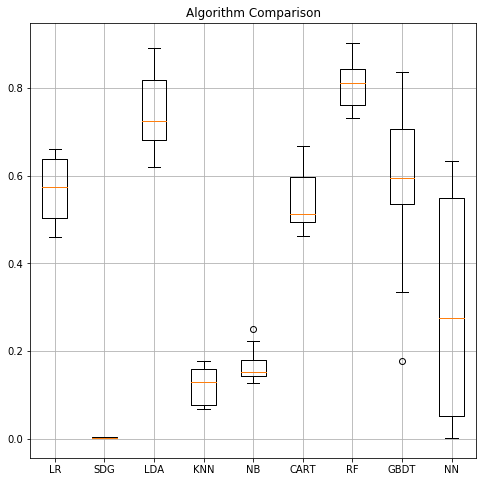

In [7]:
com.Visual()

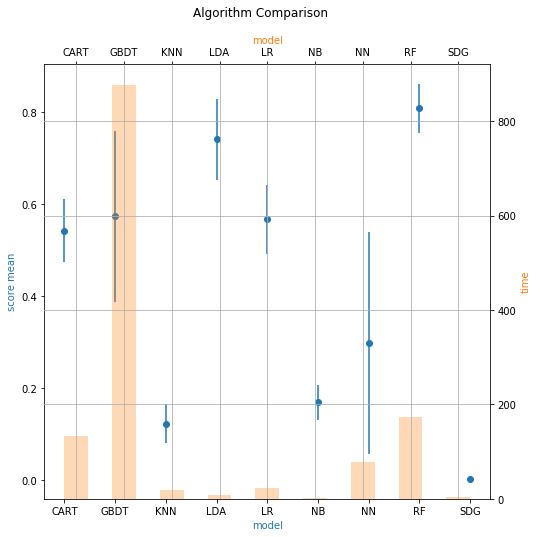

In [8]:
com.Visual(time=True)

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred]
n_models:     [11]

model  0:     [LogisticRegression]
    fold  0:  [0.01108304]
    fold  1:  [0.01072470]
    fold  2:  [0.01126099]
    fold  3:  [0.01220150]
    fold  4:  [0.01028771]
    ----
    MEAN:     [0.01111159] + [0.00063867]
    FULL:     [0.01111159]

    Fitting on full train set...

model  1:     [LinearDiscriminantAnalysis]
    fold  0:  [0.01667442]
    fold  1:  [0.01894862]
    fold  2:  [0.02436132]
    fold  3:  [0.02501224]
    fold  4:  [0.01771538]
    ----
    MEAN:     [0.02054240] + [0.00346575]
    FULL:     [0.02054239]

    Fitting on full train set...

model  2:     [KNeighborsClassifier]
    fold  0:  [0.04011015]
    fold  1:  [0.05041802]
    fold  2:  [0.05029559]
    fold  3:  [0.04813053]
    fold  4:  [0.04379224]
    ----
    MEAN:     [0.04654931] + [0.00401413]
    FULL:     [0.04654929]

    Fitting on full train set...

model  3:     [Gaussia

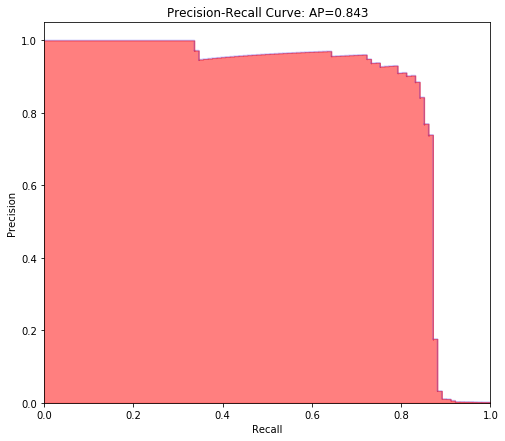

In [5]:
import Stack

stack = Stack.Stack(train, test, target, features)
stack.Level_1(append_model=None)
stack.Level_2()